## Colab Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
Change directory to where this file is located
"""
# %cd 'COPY&PASTE FILE DIRECTORY HERE'

'\nChange directory to where this file is located\n'

## Import Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# You may import other models from scikit-learn.
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

## 1. Diabetes Classification

In [3]:
diabetes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/diabetes.csv") # load dataset

In [4]:
len(diabetes)

768

In [5]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Question (a)
Train **at least 2** different classification models for the diabetes dataset and briefly explain your choice of models.

Make sure the training and evaluation codes are run in this notebook, and the results should be printed out. e.g., accuracy: 00%

(We will not run the cells to train and evaluate the models if the results are not printed out in your submitted file.)

your answer here

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

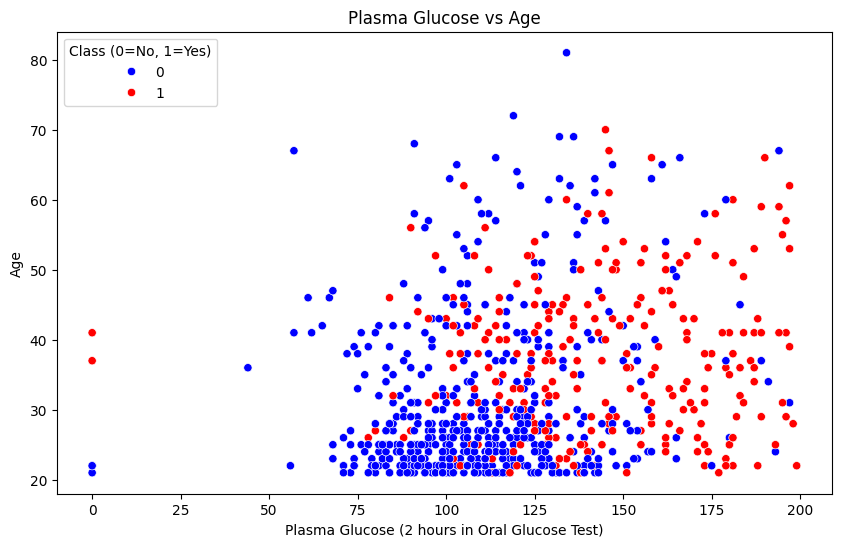

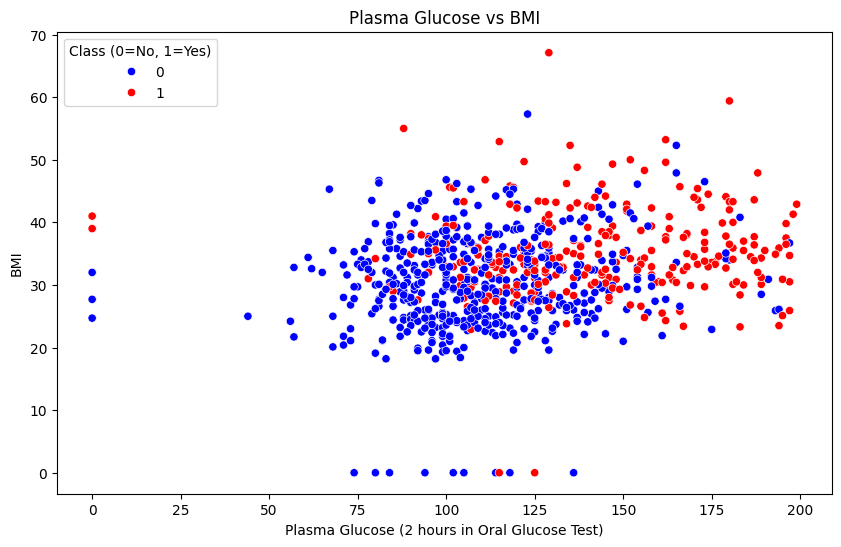

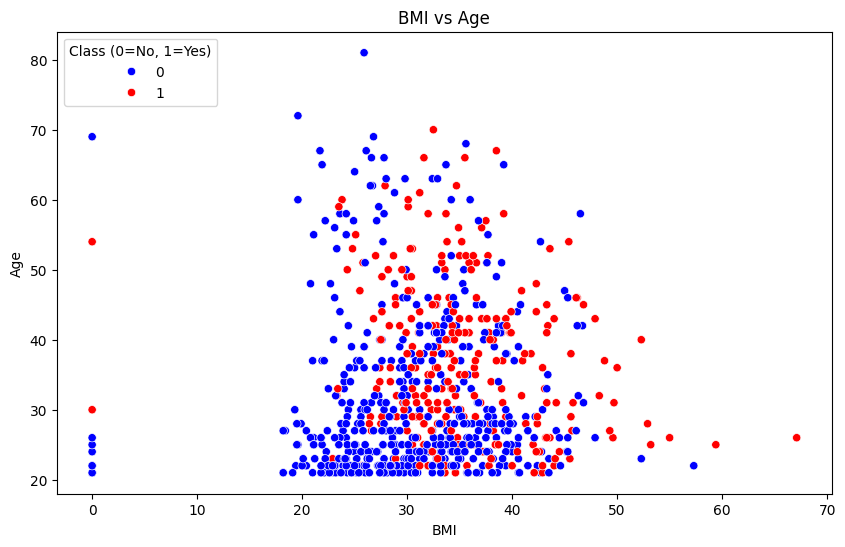

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기 (예시 데이터셋)
# 예를 들어 'diabetes.csv'에 데이터가 저장되어 있다고 가정
# diabetes = pd.read_csv('diabetes.csv')

# Feature와 target 변수 분리
X = diabetes.drop("Class variable (0 or 1)", axis=1)
y = diabetes["Class variable (0 or 1)"]

# 데이터프레임에 target 변수 추가
X['Class'] = y

# 1. Plasma glucose concentration vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
                y='Age (years)', hue='Class', palette={0: 'blue', 1: 'red'})
plt.title('Plasma Glucose vs Age')
plt.xlabel('Plasma Glucose (2 hours in Oral Glucose Test)')
plt.ylabel('Age')
plt.legend(title='Class (0=No, 1=Yes)', loc='upper left')
plt.show()

# 2. Plasma glucose concentration vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Plasma glucose concentration a 2 hours in an oral glucose tolerance test',
                y='Body mass index (weight in kg/(height in m)^2)', hue='Class', palette={0: 'blue', 1: 'red'})
plt.title('Plasma Glucose vs BMI')
plt.xlabel('Plasma Glucose (2 hours in Oral Glucose Test)')
plt.ylabel('BMI')
plt.legend(title='Class (0=No, 1=Yes)', loc='upper left')
plt.show()

# 3. BMI vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Body mass index (weight in kg/(height in m)^2)',
                y='Age (years)', hue='Class', palette={0: 'blue', 1: 'red'})
plt.title('BMI vs Age')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.legend(title='Class (0=No, 1=Yes)', loc='upper left')
plt.show()


In [ ]:
# your code here
from sklearn.model_selection import train_test_split # train과 test split하기 위함
from sklearn.preprocessing import StandardScaler # 정규화하기 위함
from sklearn.linear_model import LogisticRegression # logistic regression를 사용하기 위함
from sklearn.neighbors import KNeighborsClassifier # knn을 사용하기 위함
from sklearn.ensemble import RandomForestClassifier # random forest를 사용하기 위함
from sklearn.metrics import classification_report # model 평가를 사용하기 위함
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # bayes classifier를 사용하기 위함
from sklearn.tree import DecisionTreeClassifier

# logistic regression(linear classifier), linear discriminant analysis (bayes classifier), classification tree(decision tree). random forest(bagging), adaboosting(boosting), support vector machine, nearest neighbor 등등

X = diabetes.drop("Class variable (0 or 1)", axis = 1)
y = diabetes["Class variable (0 or 1)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
#750여개 중에 154개 test

scaler = StandardScaler() #정규화 객체
X_train = scaler.fit_transform(X_train) #평균, 표준편차 계산
X_test = scaler.transform(X_test) #정규화

# logistic regression
logreg = LogisticRegression(max_iter = 1000, random_state = 42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# linear discriminant analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

# decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# random forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# k nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# support vector machine
svm = SVC(kernel = 'rbf', random_state = 42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)



print("Logistic Regression: \n", classification_report(y_test, logreg_pred))
print("Linear Discriminant Analysis: \n", classification_report(y_test, lda_pred))
print("Decision Tree: \n", classification_report(y_test, dt_pred))
print("Random Forest: \n", classification_report(y_test, rf_pred))
print("KNN: \n", classification_report(y_test, knn_pred))
print("SVM: \n", classification_report(y_test, svm_pred))


Logistic Regression: 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Linear Discriminant Analysis: 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Decision Tree: 
               precision    recall  f1-score   support

           0       0.75      0.89      0.81       100
           1       0.69      0.44      0.54        54

    accuracy                           0.73       154
   macro avg       0.72      0.67      0.68       154
we

### Question (b)
In the next cell, report the best model and explain why you chose this model.

In your explanation, include the differences between the models you fitted in (a).

Also, describe how you optimized the final model to get the best performance.

You will get full credit if you plot the process of model optimization.

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score


from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# 하이퍼파라미터 설정
rf_params = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': np.arange(5, 30, 5),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

# Random Forest 하이퍼파라미터 튜닝
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=cv, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# SVM 하이퍼파라미터 튜닝
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

# 최적의 모델 출력
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best SVM Parameters:", svm_grid.best_params_)

# 최적 모델로 예측 및 평가
rf_best = rf_grid.best_estimator_
svm_best = svm_grid.best_estimator_

rf_pred_best = rf_best.predict(X_test)
svm_pred_best = svm_best.predict(X_test)

print("parameter tuned Random Forest: \n", classification_report(y_test, rf_pred_best))
print("parameter tuned SVM: \n", classification_report(y_test, svm_pred_best))

# Feature Selection을 위한 RFE
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=5)  # 상위 5개 Feature 선택
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)


# Feature Selection 후 (rf)
rf.fit(X_train_selected, y_train)
y_pred_selected_five = rf.predict(X_test_selected)
print("Feature Selection 후 Accuracy:", accuracy_score(y_test, y_pred_selected_five))

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf, n_features_to_select=8)  # 상위 8개 Feature 선택
X_train_selected_eight = rfe.fit_transform(X_train, y_train)
X_test_selected_eight = rfe.transform(X_test)
rf.fit(X_train_selected_eight, y_train)
y_pred_selected_eight = rf.predict(X_test_selected_eight)
print("Feature Selection 후 Accuracy:", accuracy_score(y_test, y_pred_selected_eight))

# Feature Selection 후 (svm)
svm.fit(X_train_selected, y_train)
y_pred_selected_svm = svm.predict(X_test_selected)
print("Feature Selection 후 Accuracy:", accuracy_score(y_test, y_pred_selected_svm))

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Best SVM Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
parameter tuned Random Forest: 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       100
           1       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154

parameter tuned SVM: 
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.61      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

Feature Selection 후 Accuracy: 0.7857142857142857
Feature Selection 후 Accuracy: 0.7597402597402597
Feature S

your answer for (b) here

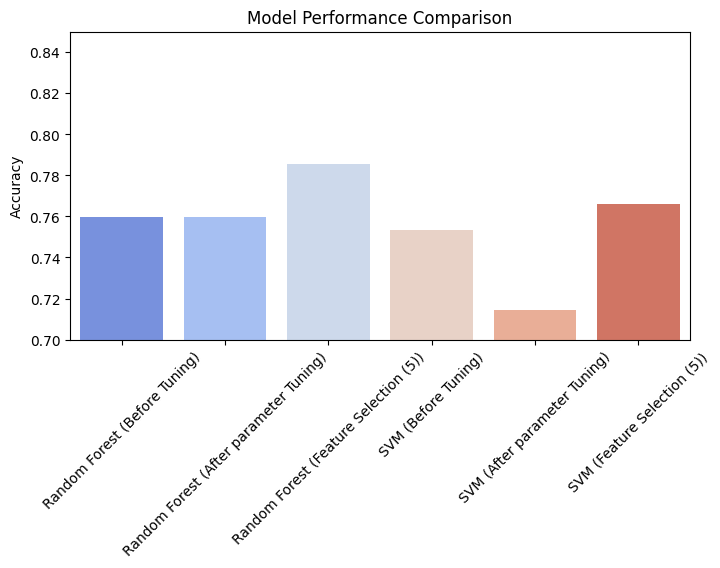

In [ ]:
models = ["Random Forest (Before Tuning)", "Random Forest (After parameter Tuning)", "Random Forest (Feature Selection (5))", "SVM (Before Tuning)", "SVM (After parameter Tuning)", "SVM (Feature Selection (5))"]

accuracies = [accuracy_score(y_test, rf_pred), accuracy_score(y_test, rf_pred_best),
              accuracy_score(y_test, y_pred_selected_five), accuracy_score(y_test, svm_pred),
              accuracy_score(y_test, svm_pred_best), accuracy_score(y_test, y_pred_selected_svm)]

plt.figure(figsize=(8, 4))
sns.barplot(x=models, y=accuracies, palette="coolwarm", hue=models, legend=False)
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.ylim(0.7, 0.85)
plt.show()


기본적으로 accuracy가 가장 높은 두 model Random Forest와 SVM을 선택하여 hyperparameter tuning을 진행하였고, hyperparameter 입력값에도 많은 값을 입력으로 넣어봤지만 성능값에 있어서 큰 성능 상승폭이 보이지 않았다.
Dataset 특성상 diabete와 관계가 없어 보이는 feature가 상당히 보여서 feature select(select개수도 줄이면서)를 진행하고 train과 prediction을 진행하였는데, 성능 향상에 효과적이었다.

## 2. Credit Score Classification

In [5]:
credit_score = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/credit_score.csv")

In [12]:
len(credit_score)

30000

In [13]:
credit_score.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,8,34.0,Musician,30375.050,2426.254167,6.0,5.0,6.0,0.0,No Data,...,Standard,1367.11,35.452909,260.0,No,0.000000,35.244025,High_spent_Medium_value_payments,448.481023,Standard
1,6,47.0,Accountant,16609.095,1488.091250,2.0,3.0,4.0,3.0,"home equity loan,credit-builder loan,student loan",...,Good,864.00,36.989979,277.0,No,22.411006,26.706984,Low_spent_Small_value_payments,305.872096,Good
2,1,17.0,Writer,66289.360,5433.113333,4.0,5.0,15.0,2.0,"personal loan,student loan",...,Standard,713.33,35.810164,189.0,Yes,61.325213,59.890917,High_spent_Medium_value_payments,524.549646,Standard
3,6,40.0,Accountant,72936.680,5800.056667,0.0,2.0,12.0,1.0,student loan,...,Good,827.89,37.082235,381.0,No,51.672175,80.016877,High_spent_Medium_value_payments,698.316615,Good
4,6,39.0,Teacher,31846.760,2703.896667,2.0,4.0,7.0,2.0,"student loan,credit-builder loan",...,Good,881.26,35.267508,190.0,No,27.407887,64.455327,High_spent_Small_value_payments,392.324645,Good


### Question (c)
Train **at least 2** different classification models for the diabetes dataset and briefly explain your choice of models.

Make sure the training and evaluation codes are run in this notebook, and the results should be printed out. e.g., accuracy: 00%

(We will not run the cells to train and evaluate the models if the results are not printed out in your submitted file.)

In [7]:
from sklearn.model_selection import train_test_split # train과 test split하기 위함
from sklearn.preprocessing import StandardScaler # 정규화하기 위함
from sklearn.linear_model import LogisticRegression # logistic regression를 사용하기 위함
from sklearn.neighbors import KNeighborsClassifier # knn을 사용하기 위함
from sklearn.ensemble import RandomForestClassifier # random forest를 사용하기 위함
from sklearn.metrics import classification_report # model 평가를 사용하기 위함
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # bayes classifier를 사용하기 위함
from sklearn.tree import DecisionTreeClassifier

# logistic regression(linear classifier), linear discriminant analysis (bayes classifier), classification tree(decision tree). random forest(bagging), adaboosting(boosting), support vector machine, nearest neighbor 등등
X = credit_score.drop("Credit_Score", axis=1)
y = credit_score["Credit_Score"]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

scaler = StandardScaler() #정규화 객체
X_train = scaler.fit_transform(X_train) #평균, 표준편차 계산
X_test = scaler.transform(X_test) #정규화

# logistic regression
logreg = LogisticRegression(max_iter = 1000, random_state = 42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# linear discriminant analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

# decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# random forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# k nearest neighbor
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# support vector machine
svm = SVC(kernel = 'rbf', random_state = 42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)



print("Logistic Regression: \n", classification_report(y_test, logreg_pred))
print("Linear Discriminant Analysis: \n", classification_report(y_test, lda_pred))
print("Decision Tree: \n", classification_report(y_test, dt_pred))
print("Random Forest: \n", classification_report(y_test, rf_pred))
print("KNN: \n", classification_report(y_test, knn_pred))
print("SVM: \n", classification_report(y_test, svm_pred))


Logistic Regression: 
               precision    recall  f1-score   support

        Good       0.60      0.67      0.63      1088
        Poor       0.72      0.67      0.69      1744
    Standard       0.75      0.75      0.75      3168

    accuracy                           0.71      6000
   macro avg       0.69      0.70      0.69      6000
weighted avg       0.71      0.71      0.71      6000

Linear Discriminant Analysis: 
               precision    recall  f1-score   support

        Good       0.57      0.77      0.65      1088
        Poor       0.74      0.67      0.70      1744
    Standard       0.78      0.72      0.75      3168

    accuracy                           0.72      6000
   macro avg       0.69      0.72      0.70      6000
weighted avg       0.73      0.72      0.72      6000

Decision Tree: 
               precision    recall  f1-score   support

        Good       0.64      0.62      0.63      1088
        Poor       0.70      0.69      0.70      1744
   

In [11]:
from sklearn.model_selection import train_test_split # train과 test split하기 위함
from sklearn.preprocessing import StandardScaler # 정규화하기 위함
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder

# logistic regression(linear classifier), linear discriminant analysis (bayes classifier), classification tree(decision tree). random forest(bagging), adaboosting(boosting), support vector machine, nearest neighbor 등등
X = credit_score.drop("Credit_Score", axis=1)
y = credit_score["Credit_Score"]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

scaler = StandardScaler() #정규화 객체
X_train = scaler.fit_transform(X_train) #평균, 표준편차 계산
X_test = scaler.transform(X_test) #정규화


# XGBoost
xgb = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, subsample=0.8, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


print("XGBoost: \n", classification_report(y_test, xgb_pred))

XGBoost: 
               precision    recall  f1-score   support

           0       0.65      0.70      0.67      1088
           1       0.75      0.70      0.72      1744
           2       0.77      0.77      0.77      3168

    accuracy                           0.74      6000
   macro avg       0.72      0.73      0.72      6000
weighted avg       0.74      0.74      0.74      6000



your answer here

### Question (d)
In the next cell, report the best model and explain why you chose this model.

In your explanation, include the differences between the models you fitted in (a).

Also, describe how you optimized the final model to get the best performance.

You will get full credit if you plot the process of model optimization.

<ipython-input-13-ed45a8a52926>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")


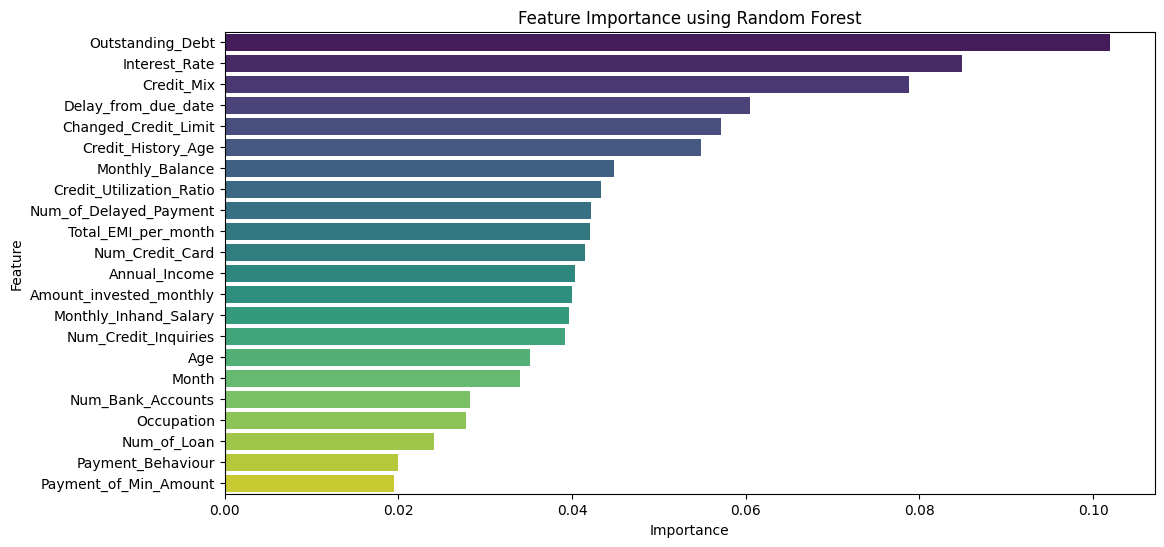

선택된 주요 Feature: ['Outstanding_Debt', 'Interest_Rate', 'Credit_Mix', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Credit_History_Age', 'Monthly_Balance', 'Credit_Utilization_Ratio', 'Num_of_Delayed_Payment', 'Total_EMI_per_month']


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 데이터 로드
# credit_score = pd.read_csv("credit_score.csv")

# Categorical 데이터 Encoding (Label Encoding)
categorical_cols = ["Occupation", "Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    credit_score[col] = le.fit_transform(credit_score[col])
    label_encoders[col] = le

# Target과 Feature 분리
X = credit_score.drop(columns=["Credit_Score", "Type_of_Loan"])  # Type_of_Loan은 너무 다양하여 제외
y = credit_score["Credit_Score"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest를 이용한 Feature Importance 평가
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance 시각화
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance using Random Forest")
plt.show()

# 중요도가 높은 Feature 선택 (예: 상위 10개)
selected_features = feature_importance.head(10)["Feature"].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("선택된 주요 Feature:", selected_features)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Feature Selection 적용 후 Random Forest 학습
rf_selected = RandomForestClassifier(n_estimators=500, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# 예측 및 평가
y_pred = rf_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print("Feature Selection 적용 후 모델 정확도:", accuracy)


Feature Selection 적용 후 모델 정확도: 0.7393333333333333


your answer for (d) here

### Question (e)
In the next cell, examine the differences between the two datasets with respect to the reasoning behind your choice of the the best model for each dataset.

####Diabetes Dataset
diabete여부를 0과 1로 classify하는 task를 binary classification으로 생각하여서, decision boundary 판단이 비교적 용이한 support vector machine이 적절하다고 생각하였고, random forest도 bagging 기법의 ensemble 모델이기에 높은 성능을 보장할 것이라고 생각하였다.

특히, diabetes dataset에서는 당뇨병 발생 여부를 판단해야 하는 문제이므로 의료 data이고 정확성이 중요하며, 혈당 수치나 BMI와 같은 feature간의 상관 관계가 아주 중요한 data라고 판단하였다. outlier 존재 가능성도 무시할 수 없어서 normalization과 preprocessing을 진행하였다.

data개수가 비교적 적은데에 비해 feature가 많으면 model이 overfitting되는 것을 확인할 수 있었고, 중요한 feature(Glucose, BMI, Age)등의 feature만 남기면 필수 정보에 집중할 수 있어서 성능이 향상됨을 볼 수 있었다.

####Credit Score Dataset
poor, standard, good으로 classify하는 task를 multi-class classification으로 생각할 수 있다. 신용 등급을 예측하는 문제이고, dataset에 포함되는 주요 feature로는 소득 수준이나 부채 비율, 대출 상환 이력등이 있다. 이 feature들에는 수치형과 범주형 변수들이 혼합되어 있는 것을 알 수 있다. 그에 따라 one hot encoding을 진행하였고, 이 문제 task의 성격상 금융 data이기 때문에 신용적인 risk를 평가하는 것이 핵심이라고 판단하였고, overfitting을 방지하는 것이 중요하다고 판단하였다.

해당 dataset은 data개수도 비교적 많기 때문에 많은 feature을 유지해도 model에서 일반화될 가능성이 높고, 또한 전체적으로 feature간 상호작용이 강한 dataset이기에 여러 feature가 함께 고려될 때 강한 예측력을 가진다고 생각하였다. 실제로 다양한 금융 활동 대부분이 model에 예측에 관여되었다고 볼 수 있었다.

####공통점
두 dataset 모두 robust하면서, 비교적 flexible한 random forest로 학습되기에 적합하면서, preprocessing이 성능 향상에 도움을 주었다. boosting model들도 random forest못지 않게 성능이 좋았던 것으로 보아, ensemble한 model들의 성능이 다른 모델에 비해 기본적으로 좋은 성능을 내었다는 점도 확인할 수 있었다.